In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('churn-data.csv')

In [3]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,two,157.0,3+,no,yes,no,sales,low
1,0.80,0.86,five,262.0,6+,no,yes,no,sales,medium
2,0.11,0.88,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,0.87,five,223.0,5+,no,yes,no,sales,low
4,0.37,0.52,two,159.0,3+,no,yes,no,sales,low


In [4]:
data[['satisfaction','evaluation']]

,satisfaction,evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [5]:
data['number_of_projects']

0          two
1         five
2        seven
3         five
4          two
         ...  
14994      two
14995      two
14996      two
14997      six
14998      two
Name: number_of_projects, Length: 14999, dtype: object

* need label encoding

In [6]:
data['time_spend_company']

0        3+
1        6+
2        4+
3        5+
4        3+
         ..
14994    3+
14995    3+
14996    3+
14997    4+
14998    3+
Name: time_spend_company, Length: 14999, dtype: object

In [7]:
data['work_accident'].value_counts()

no     12830
yes     2169
Name: work_accident, dtype: int64

In [8]:
data['promotion'].value_counts()

no     14680
yes      319
Name: promotion, dtype: int64

In [9]:
data['department'].value_counts()

sales          4099
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14990 non-null  float64
 1   evaluation            14936 non-null  float64
 2   number_of_projects    14955 non-null  object 
 3   average_montly_hours  14973 non-null  float64
 4   time_spend_company    14999 non-null  object 
 5   work_accident         14999 non-null  object 
 6   churn                 14999 non-null  object 
 7   promotion             14999 non-null  object 
 8   department            14958 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [11]:
data.isna().sum()

satisfaction             9
evaluation              63
number_of_projects      44
average_montly_hours    26
time_spend_company       0
work_accident            0
churn                    0
promotion                0
department              41
salary                   0
dtype: int64

In [12]:
(data.isna().sum())/data.shape[0]*100

satisfaction            0.060004
evaluation              0.420028
number_of_projects      0.293353
average_montly_hours    0.173345
time_spend_company      0.000000
work_accident           0.000000
churn                   0.000000
promotion               0.000000
department              0.273352
salary                  0.000000
dtype: float64

* one hot encoding for department
* promotion  : yes =1, no =0
* work accident, yes=1, no=0
* time spend + symbol should be removed
* satsifaction and evaluation (fill with numerical data)
* number of projects (fill with cat values ) then change it into numerical
* department (fill with cat)

### Missing values handling

(array([1335.,  498.,  477., 1778., 1471., 1775., 1759., 2115., 1998.,
        1784.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <BarContainer object of 10 artists>)

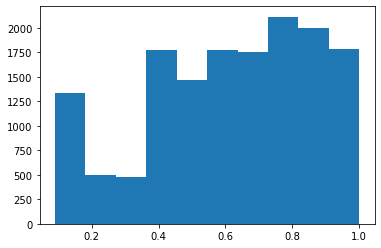

In [13]:
plt.hist(data['satisfaction'])

In [14]:
satis_median = data['satisfaction'].median()
data['satisfaction'] = data['satisfaction'].fillna(satis_median)

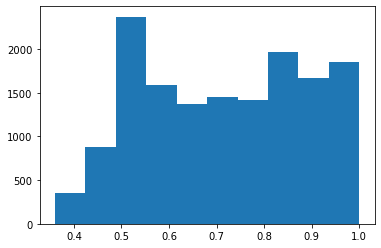

In [15]:
plt.hist(data['evaluation'])
plt.show()

In [16]:
evl_median = data['evaluation'].median()
data['evaluation'] = data['evaluation'].fillna(evl_median)

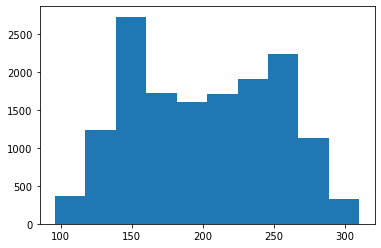

In [17]:

plt.hist(data['average_montly_hours'])
plt.show()

In [18]:
amh_mean = data['average_montly_hours'].mean()
data['average_montly_hours'] = data['average_montly_hours'].fillna(amh_mean)

In [19]:
data['number_of_projects']=data['number_of_projects'].fillna('four')

In [20]:
dept_mode = data['department'].mode()[0]
data['department'] = data['department'].fillna(dept_mode)

In [21]:
data.isna().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

* more than 10% missing values remove it

###  test processing

In [22]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,two,157.0,3+,no,yes,no,sales,low
1,0.80,0.86,five,262.0,6+,no,yes,no,sales,medium
2,0.11,0.88,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,0.87,five,223.0,5+,no,yes,no,sales,low
4,0.37,0.52,two,159.0,3+,no,yes,no,sales,low


In [23]:
data['number_of_projects'].unique()

array(['two', 'five', 'seven', 'six', 'four', 'three'], dtype=object)

In [24]:
data['number_of_projects'] = data['number_of_projects'].map({'two':2,'five':5,'seven':7,'six':6,'four':4,'three':3})

In [25]:
data['work_accident'] = data['work_accident'].map({'yes':1,'no':0})

In [26]:
data['promotion'] = data['promotion'].map({'yes':1,'no':0})

In [27]:
data.isna().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

### String repalcement

In [28]:
data['time_spend_company'] = data['time_spend_company'].str.replace('+','')

C:\Users\NIMISH~1.ANA\AppData\Local\Temp/ipykernel_20908/3028272274.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['time_spend_company'] = data['time_spend_company'].str.replace('+','')


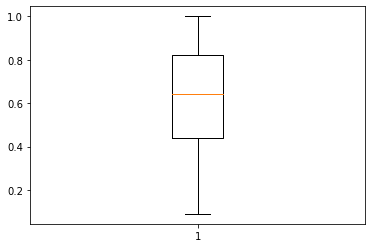

In [29]:
plt.boxplot(data['satisfaction'])
plt.show()

### label encoding

In [30]:
data['salary']


0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(data['salary'])

LabelEncoder()

In [32]:
lb.classes_ = np.array(['low','medium','high'])

In [33]:
data.loc[:,'salary'] = lb.transform(data['salary'])

In [34]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157.0,3,0,yes,0,sales,0
1,0.80,0.86,5,262.0,6,0,yes,0,sales,1
2,0.11,0.88,7,272.0,4,0,yes,0,sales,1
3,0.72,0.87,5,223.0,5,0,yes,0,sales,0
4,0.37,0.52,2,159.0,3,0,yes,0,sales,0


### one-hot encoding

In [35]:
data['department'].nunique()

10

In [36]:
#pd.get_dummies(data)

In [37]:
data.dtypes

satisfaction            float64
evaluation              float64
number_of_projects        int64
average_montly_hours    float64
time_spend_company       object
work_accident             int64
churn                    object
promotion                 int64
department               object
salary                    int32
dtype: object

In [38]:
x = data.drop('churn',axis=1)
y = data['churn']

In [39]:
x.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,department,salary
0,0.38,0.53,2,157.0,3,0,0,sales,0
1,0.80,0.86,5,262.0,6,0,0,sales,1
2,0.11,0.88,7,272.0,4,0,0,sales,1
3,0.72,0.87,5,223.0,5,0,0,sales,0
4,0.37,0.52,2,159.0,3,0,0,sales,0


In [40]:
x.dtypes

satisfaction            float64
evaluation              float64
number_of_projects        int64
average_montly_hours    float64
time_spend_company       object
work_accident             int64
promotion                 int64
department               object
salary                    int32
dtype: object

In [41]:
x['time_spend_company'] = x['time_spend_company'].astype(int)

In [42]:
x.dtypes

satisfaction            float64
evaluation              float64
number_of_projects        int64
average_montly_hours    float64
time_spend_company        int32
work_accident             int64
promotion                 int64
department               object
salary                    int32
dtype: object

In [43]:
pd.get_dummies(x)

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157.0,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262.0,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272.0,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223.0,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159.0,3,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151.0,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160.0,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143.0,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280.0,4,0,0,0,0,0,0,0,0,0,0,0,1,0


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)

In [45]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression(max_iter = 1000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

ValueError: could not convert string to float: 'support'

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [ ]:
### Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)